In [13]:
import altair as alt
import pandas as pd


Lo siguiente es importante esto para que lo pinte. Si no 

In [15]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Google Trends

In [16]:
trends=pd.read_csv("data/google_trends.csv")

A pintar!

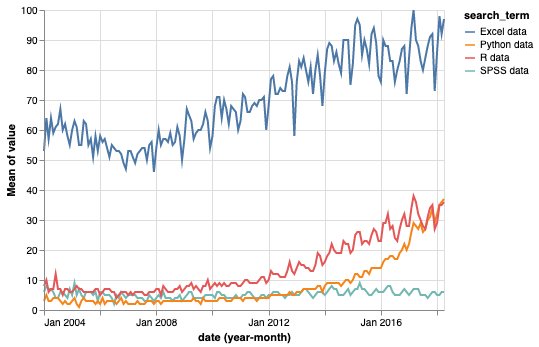

In [17]:
line_trends = alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="yearmonth"),
    y="mean(value)",
    color="search_term"
)
line_trends

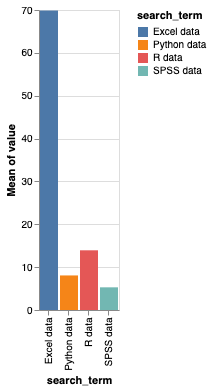

In [18]:
bar_trends = alt.Chart(trends).mark_bar().encode(
    x="search_term",
    y="mean(value)",
    color="search_term"
)
bar_trends

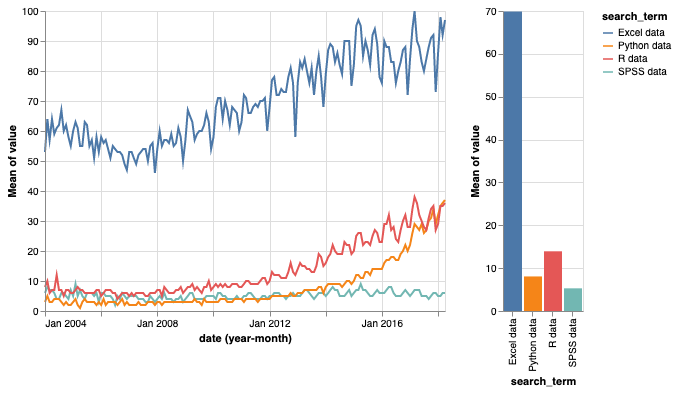

In [19]:
(line_trends | bar_trends )

Pongámosle un título

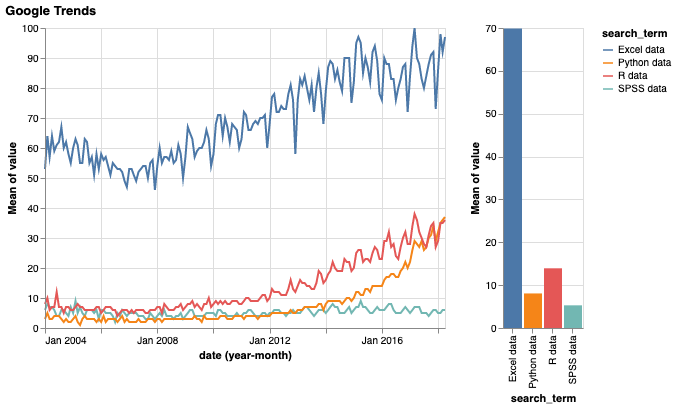

In [21]:
(line_trends | bar_trends ).properties(title="Google Trends")

Ahora voy a hacer que un gráfico actúe como filtro de otro. Si pulso en una barra, sólo se ve la gráfica de ese color en la izquierda

In [37]:
select_term = alt.selection_single(encodings=["x"])

line_trends = alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="yearmonth"),
    y="mean(value)",
    color="search_term"
).transform_filter(select_term)

bar_trends = alt.Chart(trends).mark_bar().encode(
    x="search_term",
    y="mean(value)",
    color="search_term"
).properties(selection=select_term)

(line_trends | bar_trends )

#Lo guardamos
(line_trends | bar_trends ).save("selector.html")

Ahora vamos a pintar el mismo gráfics dos veces, uno encima del otro y el de abajo más pequeño. Vamos a crear una selección en lugar de single, de intervalo. Con el gráfico de abajo podrás selecioanr intervalo de tiempo y se hará zoom en el de arriba. 

**Consejo**: poner todo en la misma celda, porque luego nos liamos con cosas a medio ejectuar

In [41]:
select_zoom = alt.selection_interval(encodings=["x"])
line_trends = alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="yearmonth"),
    y="mean(value)",
    color="search_term"
).properties(
    height=200
).transform_filter(select_zoom)

line_trends_small = alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="yearmonth"),
    y="mean(value)",
    color="search_term"
).properties(height=50, selection=select_zoom)

line_trends & line_trends_small 
#Lo guardamos
(line_trends & line_trends_small ).save("zoom.html")

Vemos como se guarda los ficheros `zoom.html` y `selector.html` autocontenidos. 

In [43]:
%ls

Advanced_Visualisation.ipynb  data/
Basecamp Download/            selector.html
Basecamp Download.zip         zoom.html
README.md


# Life Countries 

Cargamos el fichero

In [46]:
lifecountries=pd.read_csv("data/lifecountries.csv")

In [49]:
lifecountries.head()

,Unnamed: 0,Country GDP,Life Expectancy,Description,size,Continent,country
0,0,6223.367465,72.301,Country: Algeria <br>Life Expectancy: 72.30...,33333216,Africa,Algeria
1,1,4797.231267,42.731,Country: Angola <br>Life Expectancy: 42.731...,12420476,Africa,Angola
2,2,1441.284873,56.728,Country: Benin <br>Life Expectancy: 56.728 ...,8078314,Africa,Benin
3,3,12569.851770,50.728,Country: Botswana <br>Life Expectancy: 50.7...,1639131,Africa,Botswana
4,4,1217.032994,52.295,Country: Burkina Faso <br>Life Expectancy: ...,14326203,Africa,Burkina Faso


Pintamos un gráfico equivalente al de Tableu

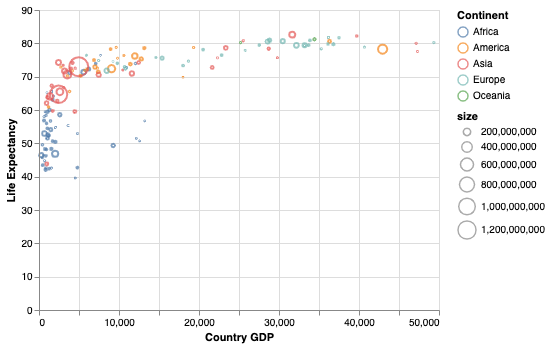

In [51]:
scatter = alt.Chart(lifecountries).mark_point().encode(
    x="Country GDP",
    y="Life Expectancy",
    color="Continent", 
    size="size"
)

scatter

Para cambiar la escala:

* Dominio: mundo real
* Range: representación

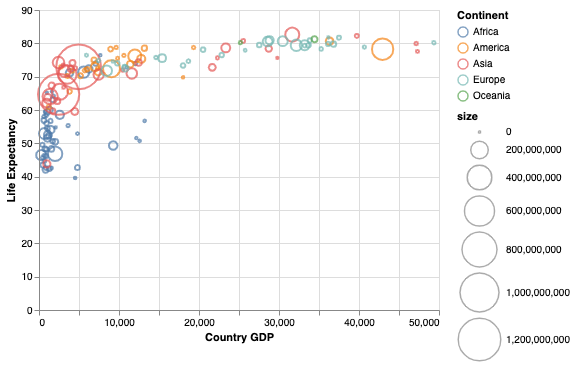

In [60]:
scatter = alt.Chart(lifecountries).mark_point().encode(
    x= 'Country GDP',
    y="Life Expectancy",
    color="Continent", 
    size=alt.Size('size',scale=alt.Scale(range=(5, 2000))),
)

scatter

Escala logarítmica en GDP y Life Expectancy:

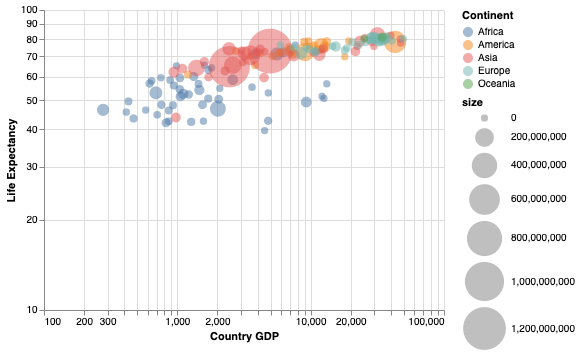

In [70]:
scatter = alt.Chart(lifecountries).mark_circle().encode(
    x= alt.X('Country GDP',scale=alt.Scale(type="log", zero=False)),
    y=alt.Y('Life Expectancy',scale=alt.Scale(type="log")),
    color="Continent", 
    size=alt.Size('size',scale=alt.Scale(range=(50, 2000))),
    tooltip='Description',
    opacity=alt.value(0.5)
)

scatter